# SIMPLE CHARACTER CLASSIFICATION

## Import Library

import libraries that will be used in the code

In [21]:
import os
import tensorflow as tf
from tensorflow.python.client import device_lib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

## Load Dataset

loads an image dataset so it can be used for training models & get class name

In [22]:
dataset = os.path.join('..', 'Data')

classes = os.listdir(dataset)
classes.sort()

datagen = ImageDataGenerator(rescale=1./255, validation_split=0.3)

split the dataset into train & validation to train the model

In [23]:
img_size = (75, 75)

train_generator = datagen.flow_from_directory(
    dataset,
    target_size=img_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    dataset,
    target_size=img_size,
    class_mode='categorical',
    subset='validation'
)

classnames = list(train_generator.class_indices.keys())

Found 1433 images belonging to 46 classes.
Found 583 images belonging to 46 classes.


## Build Model

Make a CNN model

In [24]:
jumlah_kelas = train_generator.num_classes

base_model = InceptionV3(weights='imagenet', include_top=False, input_shape=train_generator.image_shape)

for layer in base_model.layers:
    layer.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)


predictions = Dense(jumlah_kelas, activation='softmax')(x)

model = tf.keras.Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

## Train Model

early stopping of training if losses increase 3 times in a row

In [25]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights =True)

training model with train & validation dataset

In [26]:
history = model.fit(
    train_generator,
    validation_data = validation_generator, 
    epochs = 1000,
    callbacks = early_stopping
)

Epoch 1/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 9s 92ms/step - accuracy: 0.0258 - loss: 3.9972 - val_accuracy: 0.0943 - val_loss: 3.5748
Epoch 2/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.0748 - loss: 3.5589 - val_accuracy: 0.1509 - val_loss: 3.3578
Epoch 3/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1141 - loss: 3.4041 - val_accuracy: 0.1578 - val_loss: 3.1930
Epoch 4/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1291 - loss: 3.2154 - val_accuracy: 0.1715 - val_loss: 3.1176
Epoch 5/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.1736 - loss: 3.0746 - val_accuracy: 0.2298 - val_loss: 2.9243
Epoch 6/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2083 - loss: 2.8326 - val_accuracy: 0.2401 - val_loss: 2.8047
Epoch 7/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2404 - loss: 2.7359 - val_accuracy: 0.2539 - val_loss: 2.6991
Epoch 8/1000
45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.2948 - loss: 2.4788 - val_accu

check training performance to see increases in accuracy

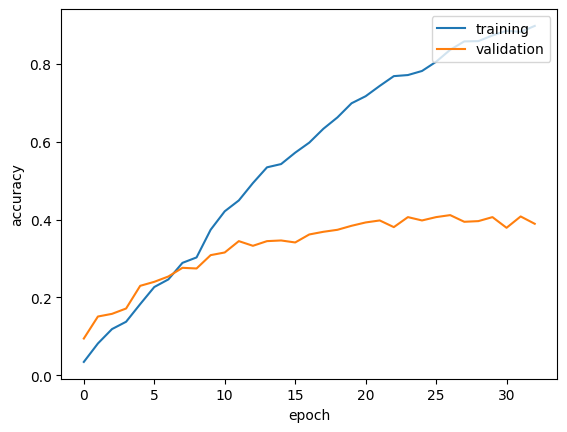

In [27]:
epoch_nums = range(0,len(history.epoch))
training_loss = history.history["accuracy"]
validation_loss = history.history["val_accuracy"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

check training performance to see a decrease in loss

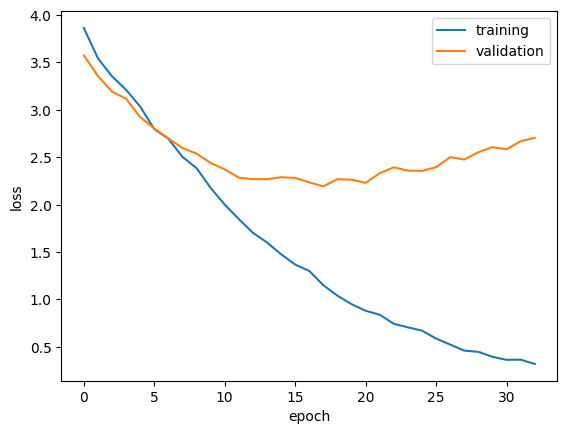

In [28]:
epoch_nums = range(0,len(history.epoch))
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

## Save Model

In [29]:
folder_path = os.path.join('..', 'Models')

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

In [30]:
model.save(os.path.join('..', 'Models', 'Pegon.ai.h5'))